<a href="https://colab.research.google.com/github/drzasrly/ANN_Pedeteksi-Jenis-Kulit-Wajah/blob/main/ANN_Kulit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os

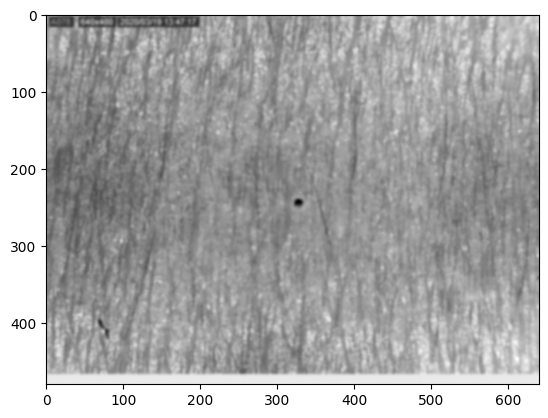

Mean: 0.6313170317606209
Std Deviasi: 0.07604152460830207
Variansi: 0.0057823134647550095
Percentile 25%: 0.5843137254901961
Percentile 75%: 0.6705882352941176


In [ ]:
# Periksa file
file_path = '/content/drive/MyDrive/dataverse_files/Normal/augNormal_1-1.jpg'
if not os.path.exists(file_path):
    print(f"File tidak ditemukan di path: {file_path}")
else:
    # Baca citra
    image = cv2.imread(file_path, cv2.IMREAD_COLOR)
    if image is None:
        print("Error: File tidak berhasil dibaca oleh OpenCV.")
    else:
        # Lanjutkan pengolahan
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image = image / 255
        plt.imshow(image, cmap='gray')
        plt.show()

        mean = np.mean(image)
        std = np.std(image)
        var = np.var(image)
        percent1 = np.percentile(image, 25)
        percent2 = np.percentile(image, 75)

        print("Mean:", mean)
        print("Std Deviasi:", std)
        print("Variansi:", var)
        print("Percentile 25%:", percent1)
        print("Percentile 75%:", percent2)


In [ ]:
image

array([[0.64313725, 0.64705882, 0.65490196, ..., 0.81176471, 0.82352941,
        0.83137255],
       [0.63921569, 0.64313725, 0.64705882, ..., 0.81176471, 0.82352941,
        0.82745098],
       [0.63529412, 0.63529412, 0.62745098, ..., 0.81176471, 0.81960784,
        0.82745098],
       ...,
       [0.87058824, 0.87058824, 0.87058824, ..., 0.87058824, 0.87058824,
        0.87058824],
       [0.87058824, 0.87058824, 0.87058824, ..., 0.87058824, 0.87058824,
        0.87058824],
       [0.87058824, 0.87058824, 0.87058824, ..., 0.87058824, 0.87058824,
        0.87058824]])

In [ ]:

normal_path = '/content/drive/MyDrive/dataverse_files/Normal'
dry_path = '/content/drive/MyDrive/dataverse_files/Dry'
oily_path = '/content/drive/MyDrive/dataverse_files/Oily'
combi_path = '/content/drive/MyDrive/dataverse_files/Combination'
image_feature = []

for file in os.listdir(normal_path):
    image = cv2.imread(os.path.abspath(normal_path + "/" + file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image / 255
    mean = np.mean(image)
    std = np.std(image)
    var = np.var(image)
    percent1 = np.percentile(image, 25)
    percent2 = np.percentile(image, 75)
    label = 0
    feature = (file, mean, std, var, percent1, percent2, label)
    image_feature.append(feature)

for file in os.listdir(dry_path):
    image = cv2.imread(os.path.abspath(dry_path + "/" + file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image / 255
    mean = np.mean(image)
    std = np.std(image)
    var = np.var(image)
    percent1 = np.percentile(image, 25)
    percent2 = np.percentile(image, 75)
    label = 1
    feature = (file, mean, std, var, percent1, percent2, label)
    image_feature.append(feature)

for file in os.listdir(oily_path):
    image = cv2.imread(os.path.abspath(oily_path + "/" + file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image / 255
    mean = np.mean(image)
    std = np.std(image)
    var = np.var(image)
    percent1 = np.percentile(image, 25)
    percent2 = np.percentile(image, 75)
    label = 2
    feature = (file, mean, std, var, percent1, percent2, label)
    image_feature.append(feature)

for file in os.listdir(combi_path):
    image = cv2.imread(os.path.abspath(combi_path + "/" + file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image / 255
    mean = np.mean(image)
    std = np.std(image)
    var = np.var(image)
    percent1 = np.percentile(image, 25)
    percent2 = np.percentile(image, 75)
    label = 3
    feature = (file, mean, std, var, percent1, percent2, label)
    image_feature.append(feature)

df = pd.DataFrame(image_feature, columns=['file', 'mean', 'std', 'var', 'percentile 25', 'percentile 75', 'label'])
df.to_csv('fitur.csv', index=False)
shutil.copy("fitur.csv", "/content/drive/MyDrive/dataverse_files")

'/content/drive/MyDrive/dataverse_files/fitur.csv'

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = ('/content/drive/MyDrive/dataverse_files/fitur.csv')
read_file = pd.read_csv(file_path)
df = pd.DataFrame(read_file)
df

,file,mean,std,var,percentile 25,percentile 75,label
0,augNormal_9-1.jpg,0.609806,0.069310,0.004804,0.568627,0.643137,0
1,augNormal_19-1.jpg,0.605135,0.101163,0.010234,0.541176,0.658824,0
2,augNormal_5-1.jpg,0.626423,0.101123,0.010226,0.560784,0.678431,0
3,augNormal_18-1.jpg,0.626420,0.101114,0.010224,0.560784,0.678431,0
4,augNormal_20-1.jpg,0.612280,0.098569,0.009716,0.549020,0.662745,0
...,...,...,...,...,...,...,...
63,augCombi_3.jpg,0.647393,0.104283,0.010875,0.584314,0.713725,3
64,augCombi_13.jpg,0.615332,0.138816,0.019270,0.560784,0.690196,3
65,augCombi_14.jpg,0.652356,0.096195,0.009254,0.596078,0.713725,3
66,augCombi_9.jpg,0.637665,0.097626,0.009531,0.572549,0.701961,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
le.fit(df["label"].values)

target = le.transform(df['label'].values)
target = to_categorical(target)
target

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],


In [ ]:
features = ['mean', 'std', 'var', 'percentile 25', 'percentile 75']
x = df.loc[:, features].values
y = df['label'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(len(y_train))
print(len(y_test))

54
14


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras import backend as K
import tensorflow as tf

# Custom metrics
def precision(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall


# Create model
def nn_model(max_len):
    model = Sequential()
    model.add(Input(shape=(max_len,)))
    model.add(Dense(32, activation="elu"))
    model.add(Dense(1024, activation="elu"))
    model.add(Dense(512, activation="elu"))
    model.add(Dense(256, activation="elu"))
    model.add(Dense(128, activation="elu"))
    model.add(Dense(64, activation="elu"))
    model.add(Dense(32, activation="elu"))
    model.add(Dense(16, activation="elu"))
    model.add(Dense(4, activation="sigmoid"))  # Sigmoid untuk output

    model.summary()
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', precision, recall])
    return model

# Check model
def check_model(model_, x, y, x_val, y_val, epochs_, batch_size_):
    hist = model_.fit(x,
                      y,
                      epochs=epochs_,
                      batch_size=batch_size_,
                      validation_data=(x_val, y_val))
    return hist

In [ ]:
max_len = x_train.shape[1]
print(f"Max Length: {max_len}")
EPOCHS = 1000
BATCH_SIZE = 32

model = nn_model(max_len)
history = check_model(model, x_train, y_train, x_test, y_test, EPOCHS, BATCH_SIZE)

Max Length: 5


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1024)                │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 733,940 (2.80 MB)

 Trainable params: 733,940 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 499ms/step - accuracy: 0.2913 - loss: 1.5027 - precision: 0.2734 - recall: 0.4451 - val_accuracy: 0.2143 - val_loss: 1.6964 - val_precision: 0.2143 - val_recall: 0.4286
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.2438 - loss: 1.5884 - precision: 0.2633 - recall: 0.4508 - val_accuracy: 0.2143 - val_loss: 1.4701 - val_precision: 0.1000 - val_recall: 0.0714
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.3160 - loss: 1.4036 - precision: 0.2051 - recall: 0.1667 - val_accuracy: 0.2143 - val_loss: 1.5200 - val_precision: 0.2143 - val_recall: 0.2143
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.2562 - loss: 1.4109 - precision: 0.1667 - recall: 0.1667 - val_accuracy: 0.2143 - val_loss: 1.4425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1632 - loss: 1.3993 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2143 - 

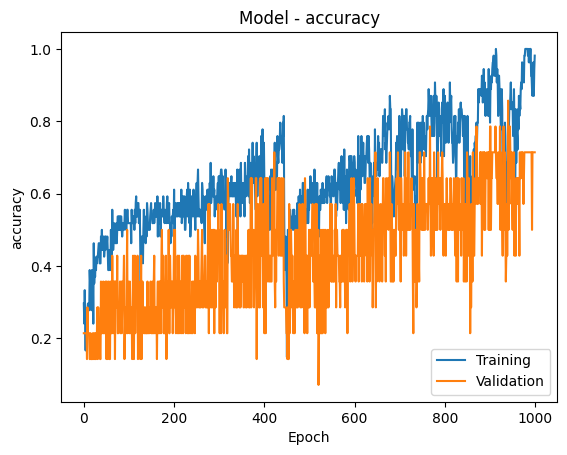

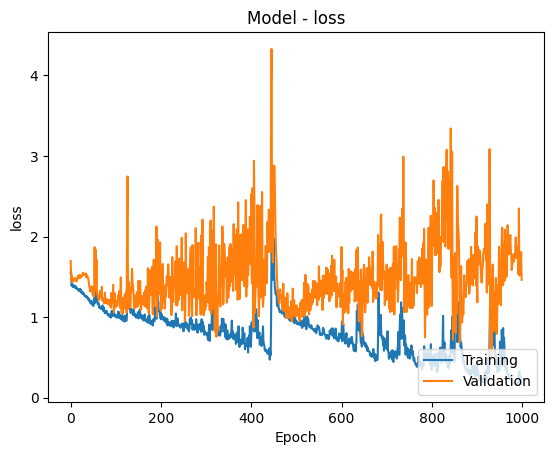

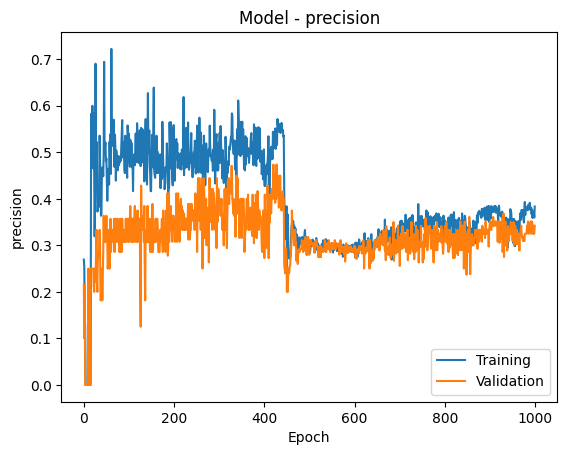

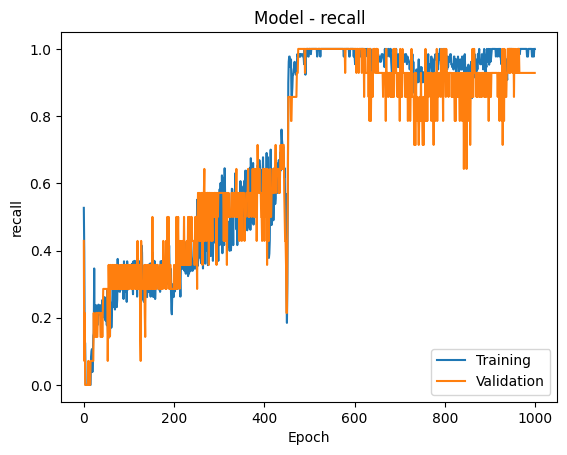

In [41]:
def evaluate_model_(history):
  names = [['accuracy', 'val_accuracy'],
           ['loss', 'val_loss'],
           ['precision', 'val_precision'],
           ['recall', 'val_recall']]

  for name in names :
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history[name[0]])
    plt.plot(history.history[name[1]])
    plt.xlabel('Epoch')
    plt.ylabel(name[0])
    plt.title('Model - ' + name[0])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show

evaluate_model_(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


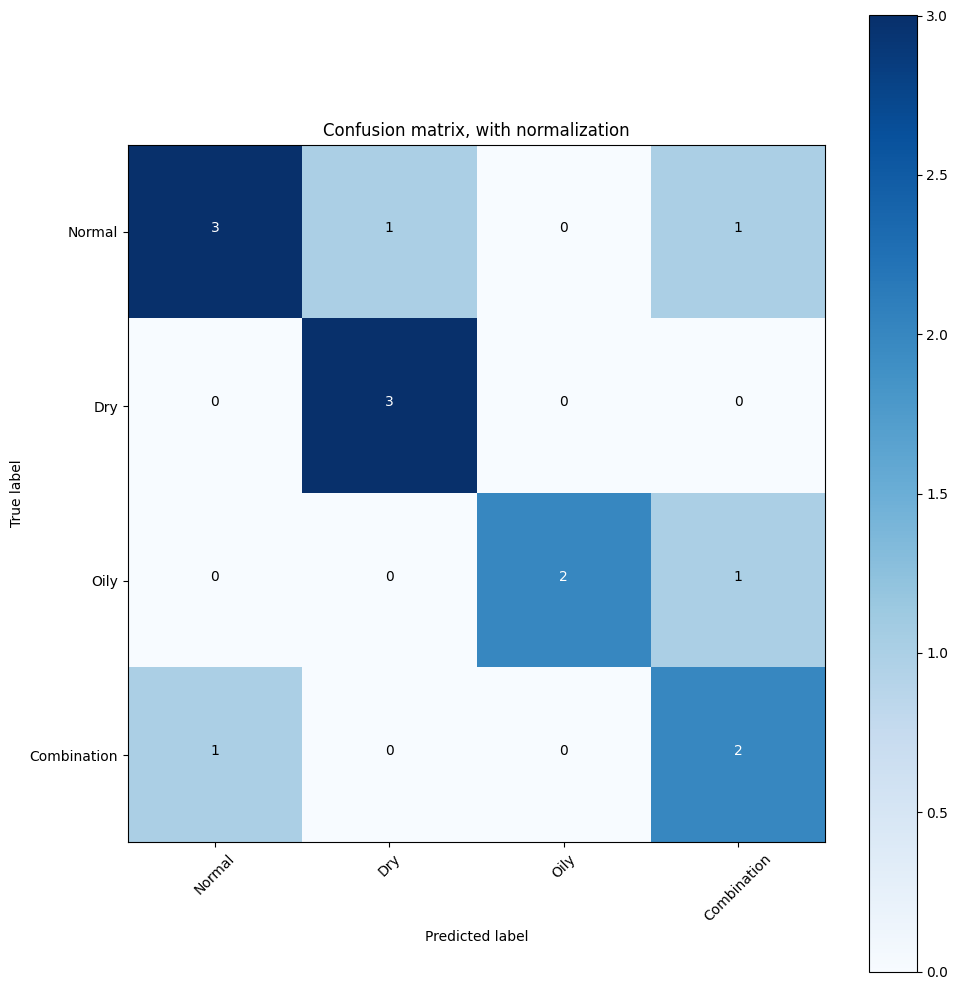

In [48]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          tittle='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(10,10))

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(tittle)
  plt.colorbar()

  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

#predict test data
y_pred=model.predict(x_test)

#compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

#plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix,
                      classes=['Normal', 'Dry', 'Oily', 'Combination'],
                      normalize=False,
                      tittle='Confusion matrix, with normalization')

In [49]:
y_pred

array([[1.00e+00, 1.00e+00, 9.99e-01, 1.00e+00],
       [6.61e-03, 9.99e-01, 9.95e-01, 3.43e-01],
       [7.76e-01, 4.17e-02, 2.47e-04, 8.99e-01],
       [9.70e-01, 9.63e-03, 5.44e-05, 9.62e-01],
       [1.00e+00, 1.00e+00, 9.16e-01, 1.00e+00],
       [3.22e-01, 9.82e-01, 1.00e+00, 9.94e-01],
       [1.00e+00, 1.00e+00, 9.76e-01, 1.00e+00],
       [1.00e+00, 6.98e-02, 9.86e-01, 9.93e-01],
       [1.00e+00, 1.00e+00, 1.60e-01, 1.00e+00],
       [1.07e-01, 9.26e-01, 6.84e-02, 2.51e-01],
       [2.38e-02, 8.29e-01, 2.78e-01, 3.90e-01],
       [6.85e-01, 1.76e-03, 4.91e-05, 9.92e-01],
       [5.90e-01, 7.61e-01, 1.00e+00, 9.99e-01],
       [9.99e-01, 1.04e-04, 9.36e-01, 9.34e-01]], dtype=float32)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1),
                            y_pred.argmax(axis=1),
                            target_names=['Normal', 'Dry', 'Oily', 'Combination']))

              precision    recall  f1-score   support

      Normal       0.75      0.60      0.67         5
         Dry       0.75      1.00      0.86         3
        Oily       1.00      0.67      0.80         3
 Combination       0.50      0.67      0.57         3

    accuracy                           0.71        14
   macro avg       0.75      0.73      0.72        14
weighted avg       0.75      0.71      0.72        14



In [59]:
import shutil
#simpan model ann
model.save("model1.keras")
print("saved model to disk")

saved model to disk


**PREDIKSI**

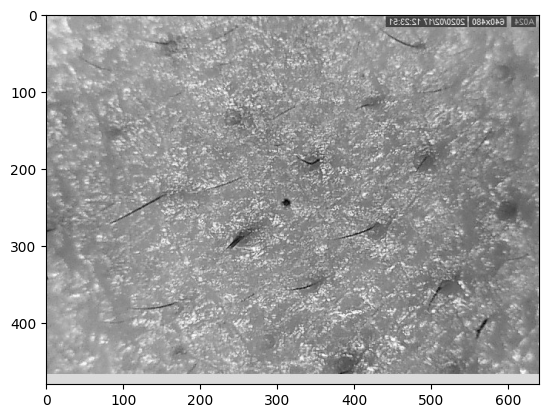

In [64]:
import csv
import cv2
import matplotlib.pyplot as plt

#baca citranya dulu
image = cv2.imread('/content/drive/MyDrive/dataverse_files/dataTest/Dry15.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
imgae=image/255
plt.imshow(image, cmap='gray')
plt.show()

#ekstrasi fitur
mean = np.mean(image)
std = np.std(image)
var = np.var(image)
percent1 = np.percentile(image, 25)
percent2 = np.percentile(image, 75)

In [76]:
x = [[mean, std, var, percent1, percent2]]
x = np.array(x)

In [77]:
y_pred=model.predict(x)
classes_y=np.argmax(y_pred,axis=1)

if classes_y==[0]:
  print('Normal')
elif classes_y==[1]:
  print('Dry')
elif classes_y==[2]:
  print('Oily')
else:
  print('Combination')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Normal
